In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [398]:
df = pd.read_csv('spain_summer_songs.csv')

/var/folders/v5/90hqz_xs4ys1hl5xzb98xyh40000gn/T/ipykernel_27077/3075018375.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix


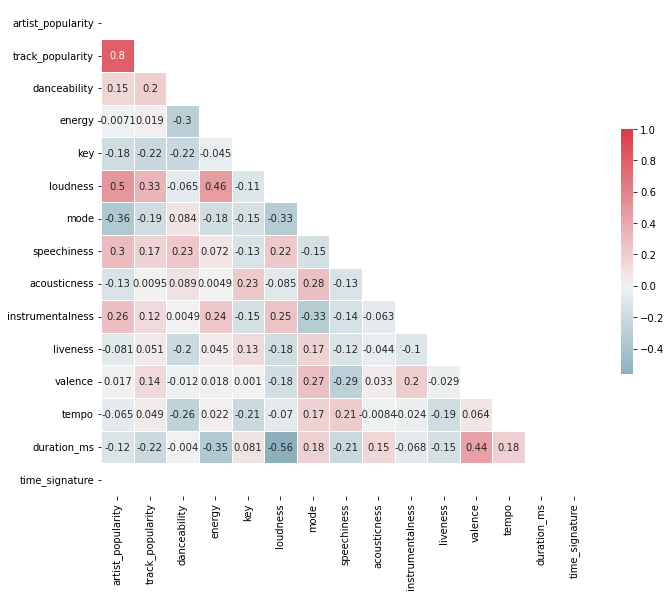

In [399]:
only_numerical = df.select_dtypes(include=np.number)

 ## correlates between the measures in the dataframe

corr = only_numerical.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix
# np.triu - makes an array which the upper right part of the rectangle is true and the bottom left is false  


#the colors you like
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

In [400]:
all_popular = pd.read_csv('all_popular_csv.csv')

In [401]:
all_popular_feat = all_popular[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

In [402]:
all_popular_feat.mean()

danceability      0.650359
energy            0.679280
key               5.386161
loudness         -6.533884
mode              0.622768
speechiness       0.074865
liveness          0.175310
valence           0.547496
tempo           119.307462
dtype: float64

In [403]:
all_popular_feat.std()

danceability     0.146215
energy           0.174448
key              3.647865
loudness         2.579474
mode             0.485236
speechiness      0.073866
liveness         0.138075
valence          0.237577
tempo           26.341175
dtype: float64

In [404]:
def scatters(x,y):

    
    plt.figure(figsize=(8, 8), dpi=80)


    plt.scatter(all_popular_feat[x],all_popular_feat[y])

    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

In [405]:
spain = pd.read_csv('spain_summer_songs.csv')

danceability


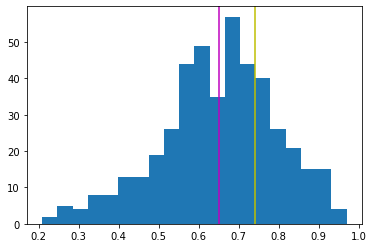

energy


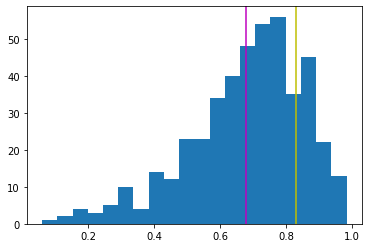

key


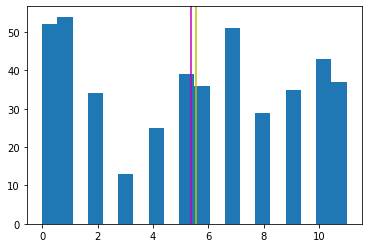

loudness


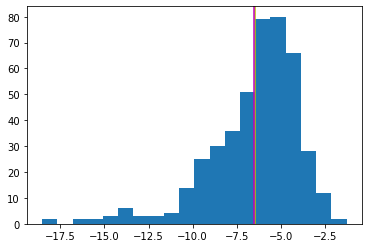

mode


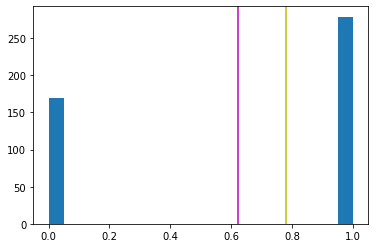

speechiness


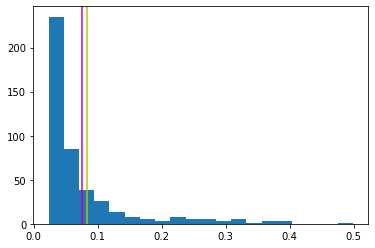

liveness


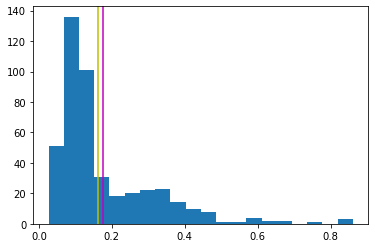

valence


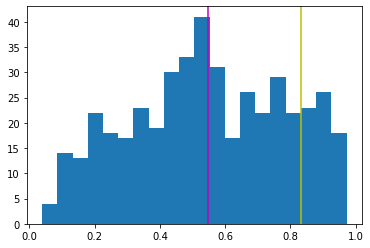

tempo


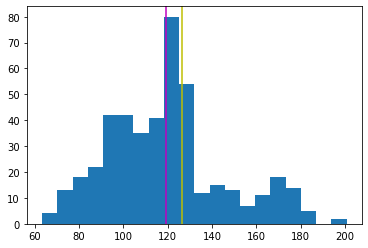

In [406]:
spain_feat = spain[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']


for feat in list:
    print(feat)
    plt.axvline(x=spain_feat[feat].mean(), color='y', linestyle='-')
    plt.axvline(x=all_popular_feat[feat].mean(), color='m', linestyle='-')
    plt.hist(all_popular_feat[feat], bins=20)
    plt.show()

In [407]:
all_popular_feat['tempo'].min()

63.392

In [408]:
import scipy.stats as st

In [409]:
all_popular.head(1)

,artist_name,track_name,album_name,release_date,artist_popularity,track_popularity,artist_genres,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Harry Styles,As It Was,As It Was,2022-03-31,92,97,['pop'],0.52,0.731,6,...,0.311,0.662,173.93,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4


In [410]:
## Confidence interval

conf_intervals = pd.DataFrame(columns=['trait', 'bottom', 'top'])


traits = ['danceability', 'energy', 'loudness', 'liveness', 'valence', 'tempo']
n= len(spain_feat)

cibot = []
citop = []
for feat in traits:
    mean_ = spain_feat[feat].mean()
    s = spain_feat[feat].std(ddof=0)
    print(feat)
    cibot.append(st.norm.interval(0.95, loc=mean_, scale=s/np.sqrt(n))[0])
    citop.append(st.norm.interval(0.95, loc=mean_, scale=s/np.sqrt(n))[1])
print(citop)
print(cibot)

conf_intervals['trait'] = traits
conf_intervals['bottom'] = cibot
conf_intervals['top'] = citop

conf_intervals

danceability
energy
loudness
liveness
valence
tempo
[0.7782801797502868, 0.8739534069249884, -5.4469988978542085, 0.22214699667020965, 0.8787460500560335, 134.81486842443496]
[0.7039698202497134, 0.7857965930750119, -7.537688602145791, 0.10234675332979039, 0.7868164499439664, 118.13281907556507]


,trait,bottom,top
0,danceability,0.703970,0.778280
1,energy,0.785797,0.873953
2,loudness,-7.537689,-5.446999
3,liveness,0.102347,0.222147
4,valence,0.786816,0.878746
5,tempo,118.132819,134.814868


In [430]:
#conf_intervals.set_index('trait', inplace=True)

conf_intervals.loc['valence']['bottom']

0.7868164499439664

In [426]:




def hit_detector(row):

    hit_score = 0
    needs = np.array([0, 0, 0, 0])

    traits = ['danceability', 'energy', 'valence']


    for trait in traits:

        if row[trait] >= conf_intervals.loc[trait, 'bottom']: # (abs(row[trait]) < abs(conf_intervals['top'][traits.index(trait)])):


            hit_score += 1
            
            print(trait, row[trait])
            

        else:
            hit_score += 0

            if trait == 'danceability':
                needs += np.array([0,1,0,0])
            elif trait == 'energy':
                needs += np.array([0,0,1,0])
            elif trait == 'valence':
                needs += np.array([0,0,0,1])


            #needs.append(trait)
            print(trait,conf_intervals['bottom'][traits.index(trait)],conf_intervals['top'][traits.index(trait)])

            #print(trait, row[trait])

    if row['mode'] == 1:
        hit_score += 0.5
    else:
        hit_score += 0


    if hit_score >= 3:
        #print(needs)

        return (1, 0,0,0)


    else:
        
        return needs

        


In [427]:
all_popular[['Hit', 'Dance_miss', 'Energy_miss', 'Valence_miss']] = all_popular.apply(hit_detector,axis = 1, result_type='expand')

danceability 0.7039698202497134 0.7782801797502868
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.7039698202497134 0.7782801797502868
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.919
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.836
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.704
energy 0.797
valence 0.825
danceability 0.733
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.7039698202497134 0.7782801797502868
energy 0.887
valence 0.853
danceability 0.7039698202497134 0.7782801797502868
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
danceability 0.881
energy 0.7857965930750119 0.8739534069249884
valence -7.537688602145791 -5.4469988978542085
dan

In [414]:
all_popular['Valence_miss'].sum()

0

In [415]:
miss = all_popular.apply(hit_detector,axis = 1, result_type='expand')

In [422]:
all_popular.Valence_miss.sum()

0

In [417]:
all_popular[all_popular['Spanish Hit'] == 'Potential Spanish Summer Hit']


KeyError: 'Spanish Hit'

In [ ]:
all_popular['Spanish Hit'].unique()

array(['danceability,energy', 'energy', 'Potential Spanish Summer Hit',
       'danceability'], dtype=object)

In [ ]:
spain['Spanish Hit'] = spain.apply(hit_detector,axis = 1)

danceability 0.773
energy 0.813
valence 0.757
danceability 0.745
energy 0.944
valence 0.951
danceability 0.851
energy 0.797
valence 0.676
danceability 0.74
energy 0.783
valence 0.812
danceability 0.814
energy 0.874
valence 0.911
danceability 0.585
energy 0.843
valence 0.879
danceability 0.628
energy 0.948
valence 0.909
danceability 0.655
energy 0.797
valence 0.839
danceability 0.739
energy 0.888
valence 0.955
danceability 0.895
energy 0.92
valence 0.891
danceability 0.868
energy 0.852
valence 0.907
danceability 0.836
energy 0.637
valence 0.875
danceability 0.616
energy 0.989
valence 0.902
danceability 0.766
energy 0.873
valence 0.743
danceability 0.841
energy 0.88
valence 0.875
danceability 0.602
energy 0.947
valence 0.883
danceability 0.718
energy 0.792
valence 0.96
danceability 0.699
energy 0.917
valence 0.889
danceability 0.802
energy 0.966
valence 0.684
danceability 0.583
energy 0.949
valence 0.954
danceability 0.87
energy 0.691
valence 0.469
danceability 0.651
energy 0.92
valence 

In [ ]:
spain[spain['Spanish Hit'] == 'Potential Spanish Summer Hit']

,artist_name,track_name,album_name,release_date,artist_popularity,track_popularity,artist_genres,danceability,energy,key,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Spanish Hit,dance_miss
0,Chayanne,Salomé,Atado A Tu Amor,1998-09-29,70,58,"['latin', 'latin pop', 'puerto rican pop', 'tr...",0.773,0.813,11,...,128.004,audio_features,4dtlsMh8wam865qaU4WEnM,spotify:track:4dtlsMh8wam865qaU4WEnM,https://api.spotify.com/v1/tracks/4dtlsMh8wam8...,https://api.spotify.com/v1/audio-analysis/4dtl...,253133,4,Potential Spanish Summer Hit,1
1,Carlos Vives,La Bicicleta,VIVES,2017-11-10,74,73,"['champeta', 'colombian pop', 'latin', 'latin ...",0.745,0.944,0,...,179.991,audio_features,0Gx4VrHzS7pZOEAGrmXXBH,spotify:track:0Gx4VrHzS7pZOEAGrmXXBH,https://api.spotify.com/v1/tracks/0Gx4VrHzS7pZ...,https://api.spotify.com/v1/audio-analysis/0Gx4...,229510,4,Potential Spanish Summer Hit,1
2,Lorna,Papi Chulo... Te Traigo El Mmmm - Radio Version,Papi Chulo... Te Traigo El Mmmm,2003-05-10,46,57,"['latin', 'perreo', 'reggaeton']",0.851,0.797,1,...,109.984,audio_features,6PRv5QDR843SgVpk4IqEit,spotify:track:6PRv5QDR843SgVpk4IqEit,https://api.spotify.com/v1/tracks/6PRv5QDR843S...,https://api.spotify.com/v1/audio-analysis/6PRv...,180467,4,Potential Spanish Summer Hit,1
4,Elvis Crespo,Suavemente,Suavemente,1998-02-27,64,65,"['latin', 'latin pop', 'tropical']",0.814,0.874,8,...,124.052,audio_features,7JIjUx3GsL0upxmNJacmtz,spotify:track:7JIjUx3GsL0upxmNJacmtz,https://api.spotify.com/v1/tracks/7JIjUx3GsL0u...,https://api.spotify.com/v1/audio-analysis/7JIj...,267160,4,Potential Spanish Summer Hit,1
8,Los Del Rio,Macarena,Hits Of The 90s,2002-05-24,56,62,['tropical'],0.739,0.888,8,...,103.186,audio_features,6mhw2fEPH4fMF0wolNm96e,spotify:track:6mhw2fEPH4fMF0wolNm96e,https://api.spotify.com/v1/tracks/6mhw2fEPH4fM...,https://api.spotify.com/v1/audio-analysis/6mhw...,222627,4,Potential Spanish Summer Hit,1
9,King Africa,La Bomba,La Bomba,2009,46,63,[],0.895,0.920,1,...,99.998,audio_features,5UmGJS0jd1r52OjnNvVHvU,spotify:track:5UmGJS0jd1r52OjnNvVHvU,https://api.spotify.com/v1/tracks/5UmGJS0jd1r5...,https://api.spotify.com/v1/audio-analysis/5UmG...,199107,4,Potential Spanish Summer Hit,1
10,Proyecto Uno,Tiburon,El Poder de la Música,1998-08-25,54,56,"['latin', 'latin house', 'tropical']",0.868,0.852,0,...,130.155,audio_features,26T9IOS6Bi9iOUjKkcZsZo,spotify:track:26T9IOS6Bi9iOUjKkcZsZo,https://api.spotify.com/v1/tracks/26T9IOS6Bi9i...,https://api.spotify.com/v1/audio-analysis/26T9...,302333,4,Potential Spanish Summer Hit,1
13,Shakira,Waka Waka (This Time for Africa) [The Official...,Waka Waka (This Time for Africa) [The Official...,2010-05-07,85,80,"['colombian pop', 'dance pop', 'latin', 'latin...",0.766,0.873,11,...,126.988,audio_features,2Cd9iWfcOpGDHLz6tVA3G4,spotify:track:2Cd9iWfcOpGDHLz6tVA3G4,https://api.spotify.com/v1/tracks/2Cd9iWfcOpGD...,https://api.spotify.com/v1/audio-analysis/2Cd9...,202627,4,Potential Spanish Summer Hit,1
14,Los Cantantes,El Venao,El Virao,1995-07-07,48,58,['tropical'],0.841,0.880,11,...,131.550,audio_features,66y4liRr8Orq45N0I6VRAP,spotify:track:66y4liRr8Orq45N0I6VRAP,https://api.spotify.com/v1/tracks/66y4liRr8Orq...,https://api.spotify.com/v1/audio-analysis/66y4...,292800,4,Potential Spanish Summer Hit,1
16,Enrique Iglesias,Bailando - Spanish Version,SEX AND LOVE,2014-01-01,76,41,"['dance pop', 'latin', 'latin pop', 'mexican p...",0.718,0.792,7,...,90.949,audio_features,0OozoN53XvHPASSHHkPGhR,spotify:track:0OozoN53XvHPASSHHkPGhR,https://api.spotify.com/v1/tracks/0OozoN53XvHP...,https://api.spotify.com/v1/audio-analysis/0Ooz...,243387,4,Potential Spanish Summer Hit,1


In [ ]:


## Try to return also which of the variables is missing in order to make it a hit

# Test the function with dream ticket songs

In [ ]:
spain[['Spanish Hit']]

,Spanish Hit
0,Potential Spanish Summer Hit
1,Potential Spanish Summer Hit
2,Potential Spanish Summer Hit
3,[energy]
4,Potential Spanish Summer Hit
5,[danceability]
6,[danceability]
7,[danceability]
8,Potential Spanish Summer Hit
9,Potential Spanish Summer Hit


In [ ]:
def miss_detector(row):

    traits = ['danceability', 'energy', 'valence',]

    if row[trait] >= conf_intervals['bottom'][traits.index(trait)]:

        return 0

    else:
        return 1

In [ ]:
spain['valenc_miss']= spain.apply(miss_detector,axis = 1)

In [ ]:
spain

,artist_name,track_name,album_name,release_date,artist_popularity,track_popularity,artist_genres,danceability,energy,key,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Spanish Hit,dance_miss
0,Chayanne,Salomé,Atado A Tu Amor,1998-09-29,70,58,"['latin', 'latin pop', 'puerto rican pop', 'tr...",0.773,0.813,11,...,128.004,audio_features,4dtlsMh8wam865qaU4WEnM,spotify:track:4dtlsMh8wam865qaU4WEnM,https://api.spotify.com/v1/tracks/4dtlsMh8wam8...,https://api.spotify.com/v1/audio-analysis/4dtl...,253133,4,Potential Spanish Summer Hit,1
1,Carlos Vives,La Bicicleta,VIVES,2017-11-10,74,73,"['champeta', 'colombian pop', 'latin', 'latin ...",0.745,0.944,0,...,179.991,audio_features,0Gx4VrHzS7pZOEAGrmXXBH,spotify:track:0Gx4VrHzS7pZOEAGrmXXBH,https://api.spotify.com/v1/tracks/0Gx4VrHzS7pZ...,https://api.spotify.com/v1/audio-analysis/0Gx4...,229510,4,Potential Spanish Summer Hit,1
2,Lorna,Papi Chulo... Te Traigo El Mmmm - Radio Version,Papi Chulo... Te Traigo El Mmmm,2003-05-10,46,57,"['latin', 'perreo', 'reggaeton']",0.851,0.797,1,...,109.984,audio_features,6PRv5QDR843SgVpk4IqEit,spotify:track:6PRv5QDR843SgVpk4IqEit,https://api.spotify.com/v1/tracks/6PRv5QDR843S...,https://api.spotify.com/v1/audio-analysis/6PRv...,180467,4,Potential Spanish Summer Hit,1
3,Shakira,La Tortura (feat. Alejandro Sanz),"Fijación Oral, Vol. 1",2005-06-03,85,74,"['colombian pop', 'dance pop', 'latin', 'latin...",0.740,0.783,0,...,100.011,audio_features,5BSclXJTa9B0iURhUjZo50,spotify:track:5BSclXJTa9B0iURhUjZo50,https://api.spotify.com/v1/tracks/5BSclXJTa9B0...,https://api.spotify.com/v1/audio-analysis/5BSc...,212893,4,energy,1
4,Elvis Crespo,Suavemente,Suavemente,1998-02-27,64,65,"['latin', 'latin pop', 'tropical']",0.814,0.874,8,...,124.052,audio_features,7JIjUx3GsL0upxmNJacmtz,spotify:track:7JIjUx3GsL0upxmNJacmtz,https://api.spotify.com/v1/tracks/7JIjUx3GsL0u...,https://api.spotify.com/v1/audio-analysis/7JIj...,267160,4,Potential Spanish Summer Hit,1
5,Lorca,Ritmo De La Noche - Radio Version,Ritmo De La Noche,1990-05-04,25,43,[],0.585,0.843,2,...,122.489,audio_features,3iJtnOzdEmkVLgaPUPT4b8,spotify:track:3iJtnOzdEmkVLgaPUPT4b8,https://api.spotify.com/v1/tracks/3iJtnOzdEmkV...,https://api.spotify.com/v1/audio-analysis/3iJt...,228333,4,danceability,0
6,Sonia Y Selena,Yo Quiero Bailar,Yo Quiero Bailar,2001-01-01,40,56,['spanish pop'],0.628,0.948,11,...,133.952,audio_features,4rFCPjKfgbEeNvs1Ku4nbd,spotify:track:4rFCPjKfgbEeNvs1Ku4nbd,https://api.spotify.com/v1/tracks/4rFCPjKfgbEe...,https://api.spotify.com/v1/audio-analysis/4rFC...,213067,4,danceability,0
7,Luis Fonsi,Despacito,VIDA,2019-02-01,75,80,"['latin', 'latin pop', 'puerto rican pop']",0.655,0.797,2,...,177.928,audio_features,6habFhsOp2NvshLv26DqMb,spotify:track:6habFhsOp2NvshLv26DqMb,https://api.spotify.com/v1/tracks/6habFhsOp2Nv...,https://api.spotify.com/v1/audio-analysis/6hab...,229360,4,danceability,0
8,Los Del Rio,Macarena,Hits Of The 90s,2002-05-24,56,62,['tropical'],0.739,0.888,8,...,103.186,audio_features,6mhw2fEPH4fMF0wolNm96e,spotify:track:6mhw2fEPH4fMF0wolNm96e,https://api.spotify.com/v1/tracks/6mhw2fEPH4fM...,https://api.spotify.com/v1/audio-analysis/6mhw...,222627,4,Potential Spanish Summer Hit,1
9,King Africa,La Bomba,La Bomba,2009,46,63,[],0.895,0.920,1,...,99.998,audio_features,5UmGJS0jd1r52OjnNvVHvU,spotify:track:5UmGJS0jd1r52OjnNvVHvU,https://api.spotify.com/v1/tracks/5UmGJS0jd1r5...,https://api.spotify.com/v1/audio-analysis/5UmG...,199107,4,Potential Spanish Summer Hit,1
